In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab csv/Titanic.csv')

查看資料樣態與資料分布狀況，本資料集為數值與類別混合型態

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


以視覺化方式確認是否有空值，白線代表有空值需處理<br>
從圖中可以看到age這個欄位缺失很多

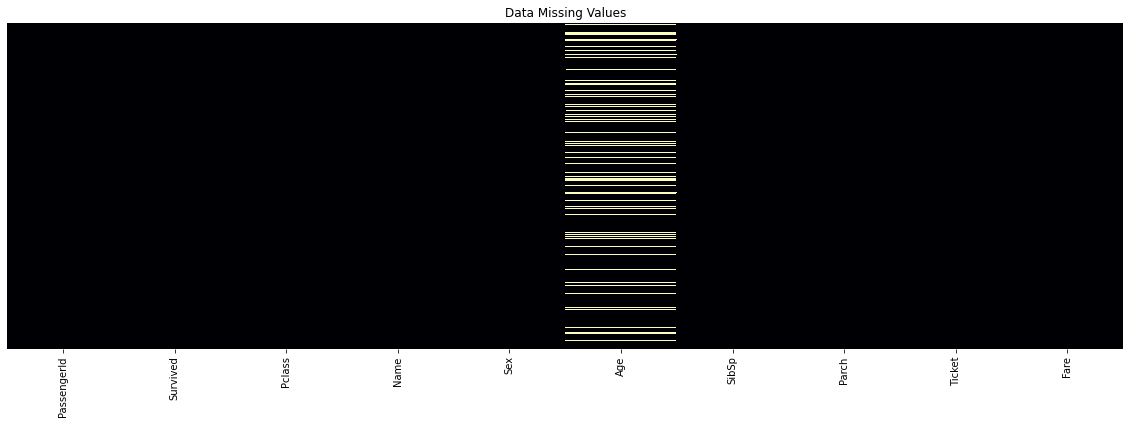

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Data Missing Values')
plt.xticks(rotation=90)

sns.heatmap(df.iloc[:,:-2].isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax)

plt.show()

預測目標Survived，存活與否之數量比約為4:6，為避免機器盲猜死亡（Survived = 0）而導致模型預測準確較高之假象，故待前處理完成後會以SMOTE做類別平衡處理

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

以視覺化方式觀察各個欄位與生存與否之關係

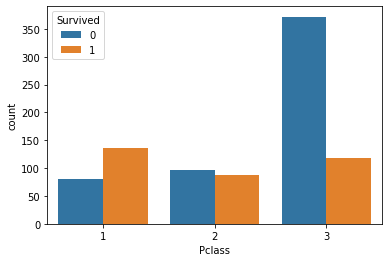

In [ ]:
sns.countplot(df['Pclass'], hue=df['Survived'])

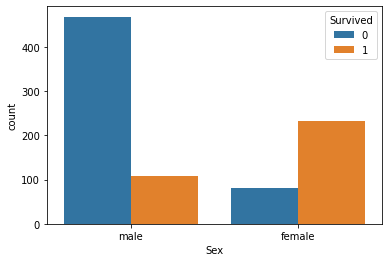

In [ ]:
sns.countplot(df['Sex'], hue=df['Survived'])

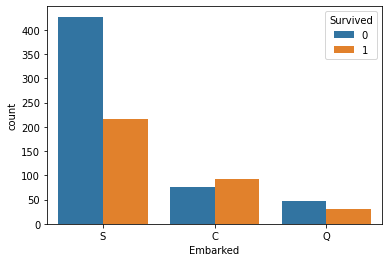

In [ ]:
sns.countplot(df['Embarked'], hue=df['Survived'])

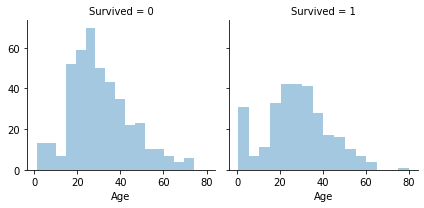

In [ ]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

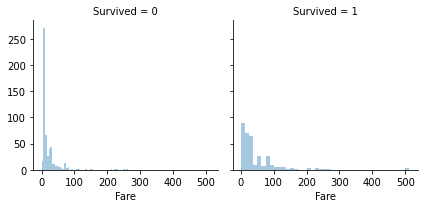

In [ ]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

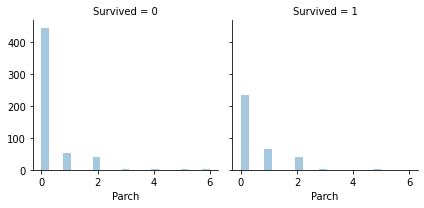

In [ ]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

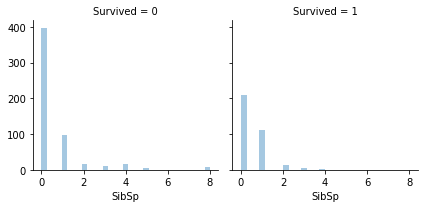

In [ ]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

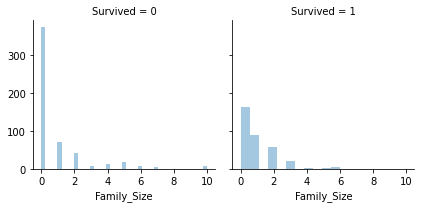

In [ ]:
#合併Parch&Sibsp 新增Family_size
df['Family_Size'] = df['Parch'] + df['SibSp']
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

觀察Name這個欄位，其組成結構為： 名, 稱謂. 姓氏

In [ ]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

將Name欄位中的“稱謂”提取出來，放到新的欄位'Title1'<br>
先將逗號前的字分割，再將句號後的字分割，保留中間的Title

In [ ]:
df['Title1'] = df['Name'].str.split(", ", expand=True)[1]
df['Name'].str.split(", ", expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [ ]:
df['Title1'] = df['Title1'].str.split(".", expand=True)[0]
df['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

初步提取出17種稱謂

In [ ]:
print(df['Title1'].unique())
print('Title num:',len(df['Title1'].unique()))

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
Title num: 17


查看各個‘稱謂’中，性別與生還的狀況<br>
發現以女性為主的稱謂（Mrs、Miss、Lady），生還率明顯較高

In [ ]:
pd.crosstab(df['Title1'],df['Sex']).T.style.background_gradient(cmap='Pastel1')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [ ]:
pd.crosstab(df['Title1'],df['Survived']).T.style.background_gradient(cmap='Pastel1')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


查看各個稱謂的平均年齡，接著將性別相同且平均年紀相似的稱謂合併<br>
歸納出四大稱謂‘Mr', 'Mrs', 'Miss', 'Master'，並創造新欄位"Title2''

In [ ]:
df.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [ ]:
df['Title2'] = df['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady', 'the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                                             ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [ ]:
df['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [ ]:
df.groupby('Title2')['Age'].mean()

Title2
Master     4.574167
Miss      21.845638
Mr        33.022727
Mrs       35.873874
Name: Age, dtype: float64

In [ ]:
pd.crosstab(df['Title2'],df['Sex']).T.style.background_gradient(cmap='Pastel1')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,185,1,128
male,40,0,537,0


In [ ]:
pd.crosstab(df['Title2'],df['Survived']).T.style.background_gradient(cmap='Pastel1')  

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0,17,55,451,26
1,23,130,87,102


Ticket組成複雜，將其簡化為純英文代碼，非字母轉換成Ｘ，符號以空白取代。<br>
最後提取出31種，並將其以長條圖呈現，明顯看到Ｘ佔大多數<BR>


In [ ]:
df['Ticket_info'] = df['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [ ]:
print(df['Ticket_info'].unique())
print('Ticket info num: ',len(df['Ticket_info'].unique()))

['A5' 'PC' 'STONO2' 'X' 'PP' 'CA' 'SCParis' 'SCA4' 'A4' 'SP' 'SOC' 'WC'
 'SOTONOQ' 'WEP' 'STONO' 'C' 'SCPARIS' 'SOP' 'Fa' 'LINE' 'FCC' 'SWPP'
 'SCOW' 'PPP' 'SC' 'SCAH' 'AS' 'SOPP' 'FC' 'SOTONO2' 'CASOTON']
Ticket info num:  31


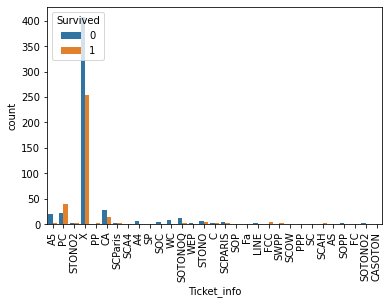

In [ ]:
#df['Ticket_info'].value_counts()
a=sns.countplot(df['Ticket_info'], hue=df['Survived'])
a.set_xticklabels(a.get_xticklabels(), rotation=90)
None #不顯示label

經處理後Ticket大幅簡化，但分佈依然很分散<br>
通常票券或艙等之類的編號組成都會有所依據，故假設同樣字母開頭的票為類似區域、類似等級<br>
故再將Ticket簡化為單一字母，最終有8種

In [ ]:
df['Ticket_info'] = df['Ticket_info'].str.slice(0, 1)
print(df['Ticket_info'].unique())
print('Ticket num:',len(df['Ticket_info'].unique()))

['A' 'P' 'S' 'X' 'C' 'W' 'F' 'L']
Ticket num: 8


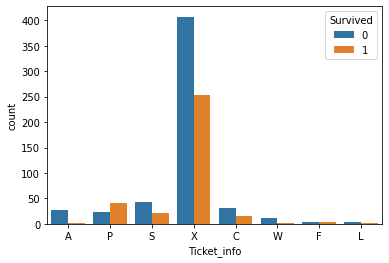

In [ ]:
a=sns.countplot(df['Ticket_info'], hue=df['Survived'])
a.set_xticklabels(a.get_xticklabels()) #, rotation=90)
None #不顯示label

查看Embarked 的分布狀況，並以眾數(S)填補缺失值

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode() )
#df['Embarked'].notnull().any()

以Fare的平均值填補缺失值

In [ ]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

Cabin欄位缺失過多，僅有20%左右的資料 (204/891=0.22)，故捨棄該欄位

In [ ]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

將類別變數轉成數值型態，代換到原本的dataframe

In [ ]:
df['Sex'] = df['Sex'].astype('category').cat.codes
df['Embarked'] = df['Embarked'].astype('category').cat.codes
df['Title1'] = df['Title1'].astype('category').cat.codes
df['Title2'] = df['Title2'].astype('category').cat.codes
df['Ticket_info'] = df['Ticket_info'].astype('category').cat.codes
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2,Ticket_info
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,11,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,12,3,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,8,1,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1,12,3,7
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,11,2,7


利用RandomForsestRegressor做年齡推估，處理空缺值<br>
將Fare & Family_size的離群值剔除，並用'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1','Ticket_info'等欄位去推估Age

In [ ]:
dataAgeNull = df[df["Age"].isnull()]
dataAgeNotNull = df[df["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std())) |
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]
rfr_age = RandomForestRegressor(n_estimators=500,random_state=123)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1','Ticket_info']
rfr_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

ageNullValues = rfr_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

確認Cabin以外的所有欄位處理完成，都無缺失值

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int8   
 12  Family_Size  891 non-null    int64  
 13  Title1       891 non-null    int8   
 14  Title2       891 non-null    int8   
 15  Ticket_info  891 non-null    int8   
dtypes: float64(2), int64(6), int8(5), object(3)
memory usage: 81.0+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report

切資料，Name、Ticket、Title1處理後已產生新欄位故剔除，而Cabin則因缺失過多、填補沒意義故也剔除

In [ ]:
X = data.drop(['PassengerId','Survived', 'Name','Ticket','Title1','Cabin'], axis =1)
y = data['Survived']

以SMOTE處理類別平衡，將倖存與死亡之比例拉到接近接近1:1

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)

In [ ]:

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=100,
                             min_samples_split=5,
                             min_samples_leaf=3,
                             n_jobs=-1) 

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print ('RandomForestClassifier','\n',classification_report(y_pred,y_test))

RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       117
           1       0.88      0.89      0.89       103

    accuracy                           0.90       220
   macro avg       0.89      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



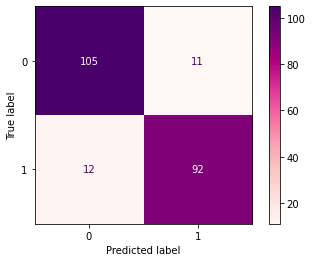

In [ ]:
plot_confusion_matrix(rf, X_test, y_test, cmap= 'RdPu')  
plt.show()

最終隨機森林之預測準確高達90%，再以Cinfusion Matrix來看，誤判（淺色區塊）的比例不高

In [ ]:
#pip install shap

將各個欄位的影響力以視覺化呈現，可以看到性別、艙等、稱謂、票價的影響力顯然較高，其中又以性別影響最大

可以推測：海難發生時婦孺優先逃離，而較高級的艙等、較貴的票可能具備較好的逃生條件，故生還率較高

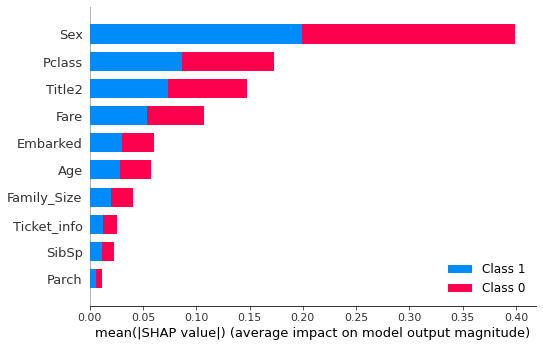

In [ ]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")